In [107]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy import stats

In [2]:
# dataset
mlb = pd.read_csv('melb_data.csv')
mlb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
mlb.shape

(13580, 21)

In [4]:
mlb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [92]:
mlb.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
mlb.duplicated().value_counts()

False    13580
dtype: int64

In [93]:
# menghilangkan data kosong
mlb_clear = mlb.dropna()
mlb_clear.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [94]:
mlb_clear.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [95]:
mlb_clear.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


# Soal No. 1

# Landsize

In [96]:
lnd = mlb_clear['Landsize']
pd.DataFrame(lnd).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Landsize,6196.0,471.00694,897.449881,0.0,152.0,373.0,628.0,37000.0


Titik Pusat Data

In [97]:
mean = np.mean(lnd)
median = np.quantile(lnd, 0.5)
mode = lnd.mode()[0]

print('Mean :', mean)
print('Median :', median)
print('Modus :', mode)

Mean : 471.00693996126535
Median : 373.0
Modus : 0.0


Persebaran Data

In [98]:
var = np.var(lnd)
std = np.std(lnd)
skew = scipy.stats.skew(lnd)
q1, q2, q3 = np.quantile(lnd, [0.25, 0.5, 0.75])
rng = np.max(lnd) - np.min(lnd)

print('Variansi :', var)
print('Standar Deviasi :', std)
print('Skewness :', skew)
print('Q1 :', q1)
print('Q2 :', q2)
print('Q3 :', q3)
print('Rentang :', rng)

Variansi : 805286.2983701712
Standar Deviasi : 897.3774559070287
Skewness : 18.834378556740738
Q1 : 152.0
Q2 : 373.0
Q3 : 628.0
Rentang : 37000.0


Distribusi Data

C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


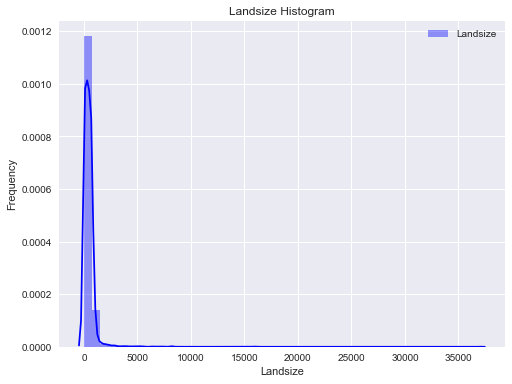

In [100]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.distplot(lnd, color='blue', label='Landsize')
plt.xlabel('Landsize')
plt.ylabel('Frequency')
plt.title('Landsize Histogram')
plt.legend(loc=0)
plt.grid(True)
plt.show()

In [109]:
stats.skewtest(mlb_clear['Landsize']), stats.kurtosistest(mlb_clear['Landsize'])

(SkewtestResult(statistic=100.80212831183034, pvalue=0.0),
 KurtosistestResult(statistic=56.11147228177177, pvalue=0.0))

# Price

In [101]:
prc = mlb_clear['Price']
pd.DataFrame(prc).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,6196.0,1.068828e+06,675156.427502,131000.0,620000.0,880000.0,1325000.0,9000000.0


Titik Pusat Data

In [102]:
mean = np.mean(prc)
median = np.quantile(prc, 0.5)
mode = prc.mode()[0]

print('Mean :', mean)
print('Median :', median)
print('Modus :', mode)

Mean : 1068828.202065849
Median : 880000.0
Modus : 600000.0


Persebaran Data

In [103]:
var = np.var(prc)
std = np.std(prc)
skew = scipy.stats.skew(prc)
q1, q2, q3 = np.quantile(prc, [0.25, 0.5, 0.75])
rng = np.max(prc) - np.min(prc)

print('Variansi :', var)
print('Standar Deviasi :', std)
print('Skewness :', skew)
print('Q1 :', q1)
print('Q2 :', q2)
print('Q3 :', q3)
print('Rentang :', rng)

Variansi : 455762632164.55664
Standar Deviasi : 675101.9420536106
Skewness : 2.4747899470275407
Q1 : 620000.0
Q2 : 880000.0
Q3 : 1325000.0
Rentang : 8869000.0


Distribusi Data

C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


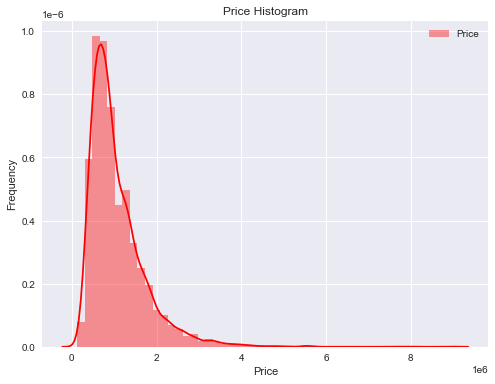

In [104]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.distplot(prc, color='red', label='Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.legend(loc=0)
plt.grid(True)
plt.show()

In [108]:
stats.skewtest(mlb_clear['Price']), stats.kurtosistest(mlb_clear['Price'])

(SkewtestResult(statistic=48.068467046145855, pvalue=0.0),
 KurtosistestResult(statistic=34.81096658594283, pvalue=1.65997904241914e-265))

# Soal No. 2

In [110]:
q1 = mlb_clear['Distance'].quantile(0.25)
q3 = mlb_clear['Distance'].quantile(0.75)

iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

print('Batas Bawah :', lower)
print('Batas Atas :', upper)

Batas Bawah : -3.8499999999999996
Batas Atas : 22.15


In [121]:
outliers = mlb_clear[(mlb_clear['Distance']>upper) | (mlb_clear['Distance']<lower)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 8733 to 12205
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         204 non-null    object 
 1   Address        204 non-null    object 
 2   Rooms          204 non-null    int64  
 3   Type           204 non-null    object 
 4   Price          204 non-null    float64
 5   Method         204 non-null    object 
 6   SellerG        204 non-null    object 
 7   Date           204 non-null    object 
 8   Distance       204 non-null    float64
 9   Postcode       204 non-null    float64
 10  Bedroom2       204 non-null    float64
 11  Bathroom       204 non-null    float64
 12  Car            204 non-null    float64
 13  Landsize       204 non-null    float64
 14  BuildingArea   204 non-null    float64
 15  YearBuilt      204 non-null    float64
 16  CouncilArea    204 non-null    object 
 17  Lattitude      204 non-null    float64
 18  Longt

In [114]:
print('Total Outliers :', outliers['Distance'].count())

Total Outliers : 204


C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


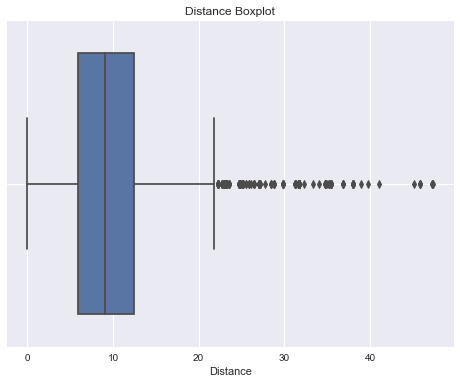

In [119]:
plt.figure(figsize=(8,6))
sns.boxplot(mlb_clear['Distance'])
plt.title('Distance Boxplot')
plt.xlabel('Distance')
plt.grid(True)
plt.show()

In [120]:
insight = outliers[['Distance', 'Regionname']]
insight.head()

,Distance,Regionname
8733,23.2,Eastern Metropolitan
8783,23.0,Eastern Metropolitan
8784,23.0,Eastern Metropolitan
8787,24.7,South-Eastern Metropolitan
8794,25.9,Northern Victoria


# Soal No. 3

# Year Built

In [122]:
ybl = mlb_clear['YearBuilt']
pd.DataFrame(ybl).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearBuilt,6196.0,1964.081988,38.105673,1196.0,1940.0,1970.0,2000.0,2018.0


C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


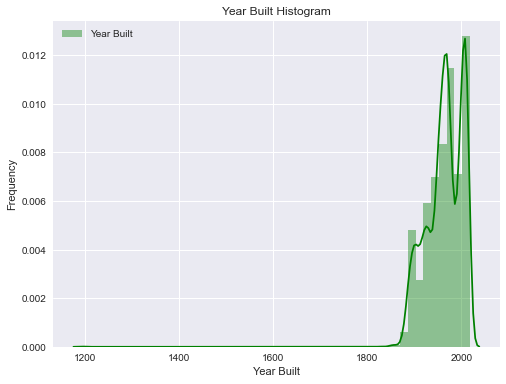

In [123]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.distplot(ybl, color='green', label='Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Year Built Histogram')
plt.legend(loc=0)
plt.grid(True)
plt.show()

In [124]:
stats.skewtest(mlb_clear['YearBuilt']), stats.kurtosistest(mlb_clear['YearBuilt'])

(SkewtestResult(statistic=-39.490986519432724, pvalue=0.0),
 KurtosistestResult(statistic=40.93872156203211, pvalue=0.0))

# Soal No. 4

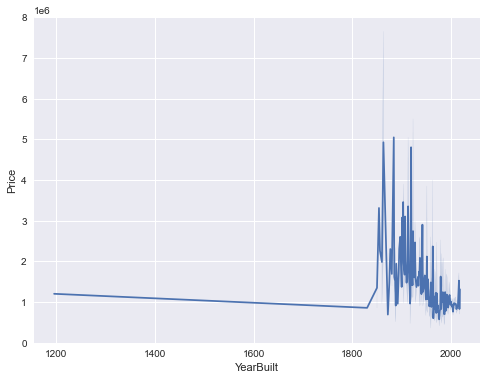

In [125]:
plt.figure(figsize = (8,6))
sns.lineplot(x = mlb_clear['YearBuilt'], y = mlb_clear['Price'])
plt.show()

# Soal No. 5

In [130]:
cor_mlb = mlb_clear[['Landsize', 'Distance', 'Rooms', 'Price']]
cor_mlb.head()

,Landsize,Distance,Rooms,Price
1,156.0,2.5,2,1035000.0
2,134.0,2.5,3,1465000.0
4,120.0,2.5,4,1600000.0
6,245.0,2.5,3,1876000.0
7,256.0,2.5,2,1636000.0


In [133]:
corr_price = cor_mlb.corr(method='spearman')
corr_price

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.408084,0.522214,0.365473
Distance,0.408084,1.000000,0.336033,-0.117274
Rooms,0.522214,0.336033,1.000000,0.591448
Price,0.365473,-0.117274,0.591448,1.000000


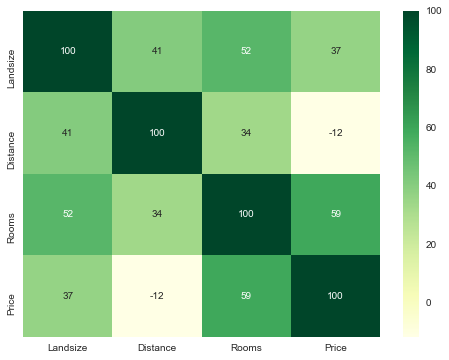

In [134]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_price*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

# Soal No. 6

# Region Name di atas Harga Rata-Rata

In [161]:
cprice = mlb_clear[mlb_clear['Price'] > mlb_clear['Price'].mean()]
cprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 2 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         2322 non-null   object 
 1   Address        2322 non-null   object 
 2   Rooms          2322 non-null   int64  
 3   Type           2322 non-null   object 
 4   Price          2322 non-null   float64
 5   Method         2322 non-null   object 
 6   SellerG        2322 non-null   object 
 7   Date           2322 non-null   object 
 8   Distance       2322 non-null   float64
 9   Postcode       2322 non-null   float64
 10  Bedroom2       2322 non-null   float64
 11  Bathroom       2322 non-null   float64
 12  Car            2322 non-null   float64
 13  Landsize       2322 non-null   float64
 14  BuildingArea   2322 non-null   float64
 15  YearBuilt      2322 non-null   float64
 16  CouncilArea    2322 non-null   object 
 17  Lattitude      2322 non-null   float64
 18  Longtit

In [164]:
region = cprice.groupby('Regionname').mean().sort_values('Price', ascending = False)['Price']
region = region.reset_index()
region

,Regionname,Price
0,Southern Metropolitan,1.921343e+06
1,South-Eastern Metropolitan,1.574458e+06
2,Eastern Metropolitan,1.532201e+06
3,Northern Metropolitan,1.462098e+06
4,Western Metropolitan,1.450193e+06


In [165]:
print('Harga Rata-Rata : ', cprice['Price'].mean())
print('Total Region Name : ', cprice['Regionname'].count())

Harga Rata-Rata :  1712350.5413436692
Total Region Name :  2322


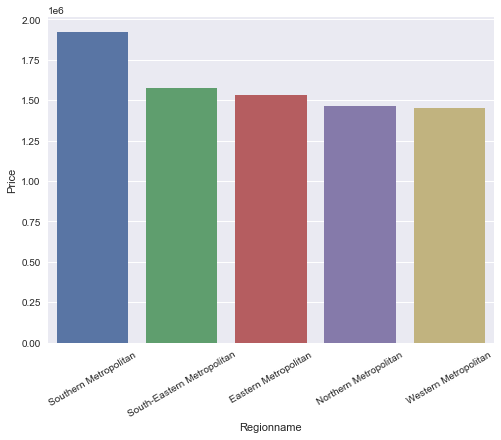

In [166]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Regionname', y = 'Price', data = region)
plt.xticks(rotation = 30)
plt.show()

Lima Council Area Rata-Rata Harga Tertinggi

In [170]:
council = cprice.groupby('CouncilArea').mean().sort_values('Price', ascending = False)['Price']
council = council.reset_index()
council

,CouncilArea,Price
0,Boroondara,2.148233e+06
1,Stonnington,2.114920e+06
2,Bayside,2.017121e+06
3,Port Phillip,1.838301e+06
4,Banyule,1.667311e+06
5,Whitehorse,1.645762e+06
6,Melbourne,1.593557e+06
7,Nillumbik,1.550000e+06
8,Yarra,1.527054e+06
9,Monash,1.526494e+06


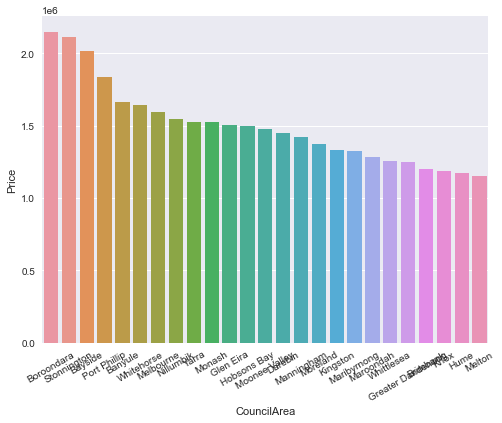

In [171]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'CouncilArea', y = 'Price', data = council)
plt.xticks(rotation = 30)
plt.show()

Tipe Properti Rata-Rata Harga Tertinggi

In [172]:
tipe = cprice.groupby('Type').mean().sort_values('Price', ascending = False)['Price']
tipe = tipe.reset_index()
tipe

,Type,Price
0,h,1.741304e+06
1,t,1.416543e+06
2,u,1.353605e+06


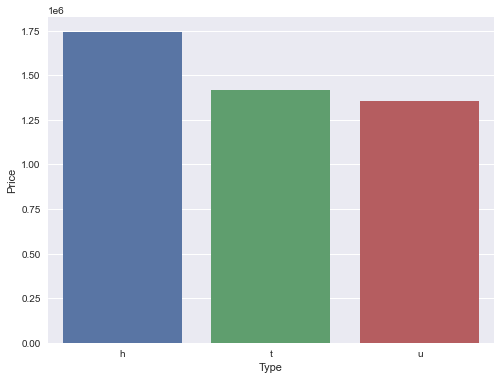

In [174]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Type', y = 'Price', data = tipe)
plt.xticks(rotation = 0)
plt.show()

Metode Penjualan Yang Paling Sering Dilakukan

In [175]:
metode = cprice['Method'].mode()

print('Metode Penjualan Yang Paling Sering Adalah ', metode)

Metode Penjualan Yang Paling Sering Adalah  0    S
dtype: object


In [177]:
method = cprice.groupby('Method').mean().sort_values('Price', ascending = False)['Price']
method = method.reset_index()
method

,Method,Price
0,VB,1.921957e+06
1,PI,1.818565e+06
2,S,1.686311e+06
3,SP,1.544800e+06
4,SA,1.463429e+06


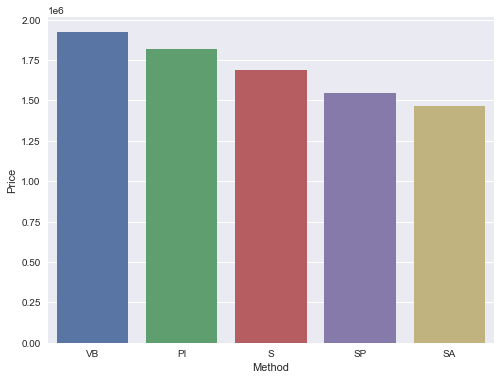

In [178]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Method', y = 'Price', data = method)
plt.xticks(rotation = 0)
plt.show()